In [180]:
%load_ext autoreload
%autoreload 2

In [181]:
%matplotlib inline
from cbrain.imports import *
from cbrain.utils import *
from keras.layers import *
from keras import backend as K
from keras.engine.topology import Layer
import tensorflow as tf
#limit_mem()
import matplotlib as mpl

In [182]:
C_P, L_V, 1./G

(1000.0, 2500000.0, 0.1019367991845056)

In [160]:
C_P = 1004.64
L_V = 2501000.0

In [170]:
C_P = 1000
L_V = 2500000.0

In [171]:
def gw_avg(ds, var):
    return (ds[var] * ds['gw'].values.reshape(-1, 64, 1)).sum(dim=('lat', 'lon')) / 2

In [172]:
DATADIR = '/scratch/05488/tg847872/debug/'

In [173]:
ds = xr.open_mfdataset(f'{DATADIR}*debug*.h1*', decode_times=False)

In [174]:
ds['vTAP'] = vint(ds, 'TAP', C_P); ds['vQAP'] = vint(ds, 'QAP', L_V)

In [175]:
ds['vNNDT'] = vint(ds, 'NNDT', C_P); ds['vNNDQ'] = vint(ds, 'NNDQ', L_V)
ds['dNNRAD'] = ds['NNFSNT'] - ds['NNFSNS'] - ds['NNFLNT'] + ds['NNFLNS']
ds['NNERRT'] = ds['vNNDT'] - ds['NNSHF'] - ds['dNNRAD'] + ds['vNNDQ'] - ds['NNLHF']

In [176]:
ds['vPPDT'] = vint(ds, 'PPDT', C_P); ds['vPPDQ'] = vint(ds, 'PPDQ', L_V)
ds['dPPRAD'] = ds['PPFSNT'] - ds['PPFSNS'] - ds['PPFLNT'] + ds['PPFLNS']
ds['PPERRT'] = ds['vPPDT'] - ds['NNSHF'] - ds['dPPRAD'] + ds['vPPDQ'] - ds['NNLHF']

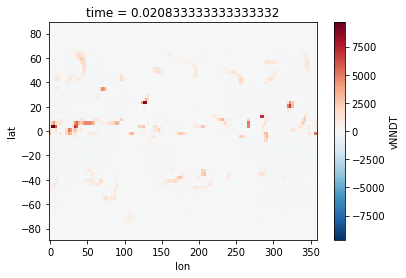

In [177]:
ds['vNNDT'].isel(time=1).plot();

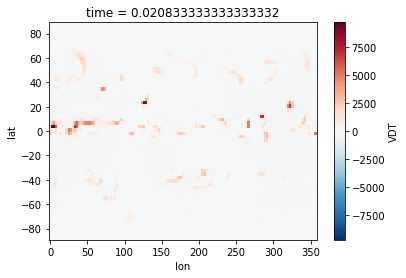

In [178]:
ds['VDT'].isel(time=1).plot();

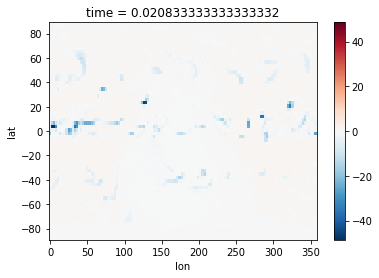

In [179]:
(ds['vNNDT'].isel(time=1) - ds['VDT'].isel(time=1)).plot();

In [136]:
dP = get_dP_from_ds(ds)

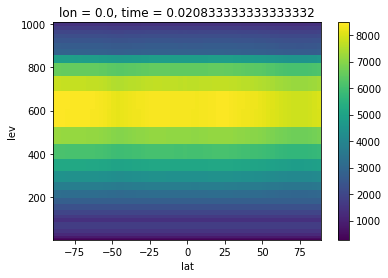

In [140]:
dP.isel(time=1, lon=0).plot();

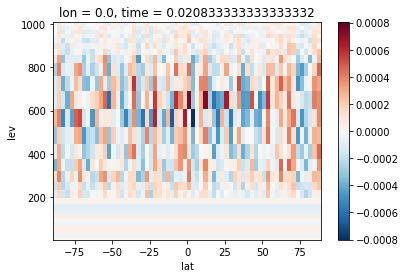

In [141]:
(dP.isel(time=1, lon=0) - ds['NNPDEL'].isel(time=1, lon=0).values).plot();

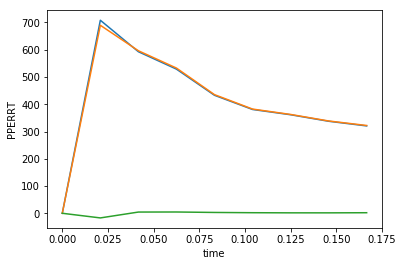

In [121]:
gw_avg(ds, 'ERRT').plot()
gw_avg(ds, 'NNERRT').plot();
gw_avg(ds, 'PPERRT').plot();

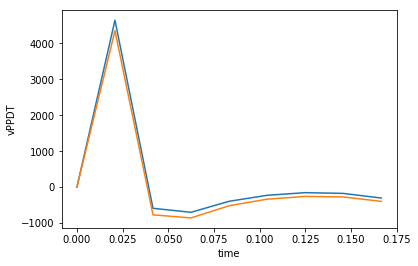

In [122]:
gw_avg(ds, 'vNNDT').plot();
gw_avg(ds, 'vPPDT').plot();

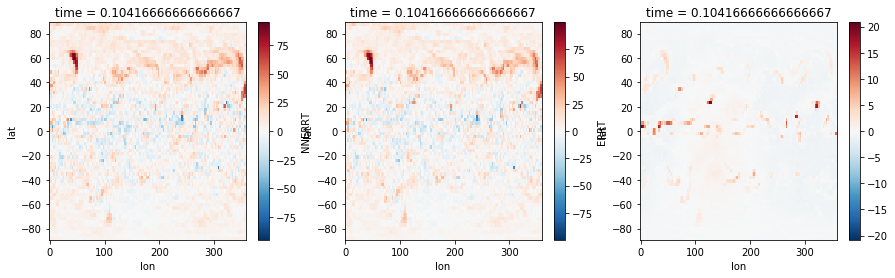

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
ds['NNERRT'].isel(time=5).plot(ax=axs[0])
ds['ERRT'].isel(time=5).plot(ax=axs[1])
(ds['ERRT'] - ds['NNERRT']).isel(time=5).plot(ax=axs[2]);

In [33]:
(ds['ERRT'] - ds['NNERRT']).isel(time=5).mean().values

array(-0.09085043)

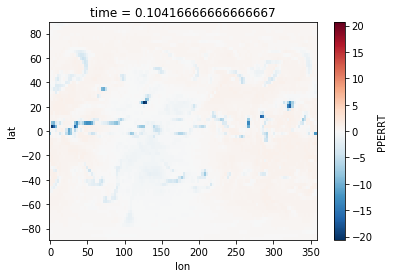

In [40]:
ds['PPERRT'].isel(time=5).plot()